# Chapter 2

In this homework, we try to implement a linear regression model from scratch with little use of external frameworks and mainly straightforward mathemeatical calculations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Data And EDA.

In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2024-09-17 13:48:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  15.4KB/s    in 1m 43s  

2024-09-17 13:50:39 (13.4 KB/s) - ‘housing.csv’ saved [1423529/1423529]



In [6]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
# Describe and information.

from IPython.display import display

display(df.describe(include=['object']).round(2))
display(df.describe().round(2))
print()
display(df.info())

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

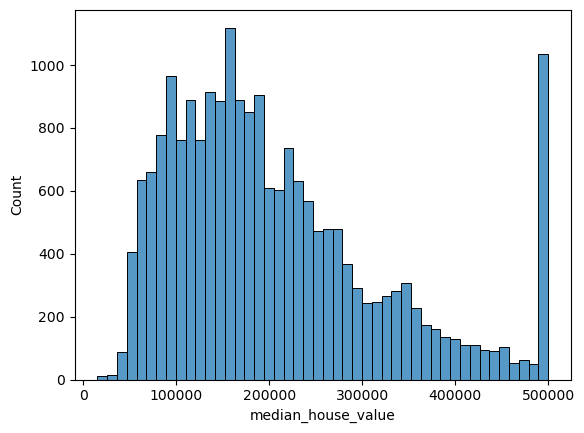

In [30]:
# Checking the median_house_value and its distribution.

#df['median_house_value'].hist(bins=20);
sns.histplot(df.median_house_value);

### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'


In [46]:
df['ocean_proximity'] == '<1H OCEAN'

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: ocean_proximity, Length: 20640, dtype: bool

In [47]:
sub_df = (df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')])
sub_df.reset_index(drop=True, inplace=True)
sub_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
1,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
2,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
3,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
4,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [48]:
# Check Unique values in ocean_prox.

sub_df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [49]:
sub_df = sub_df[['latitude', 'longitude',
                 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 
                 'households', 'median_income', 'median_house_value']]
sub_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
1,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
2,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
3,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
4,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question1

In [51]:
sub_df.isnull().sum() > 0

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

##  Question 2

In [52]:
sub_df.population.median()

1195.0

## Question 3

- Prepare and split the dataset
- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [56]:
np.random.seed(42)  #Setting seed.

len_sub_df = len(sub_df)
len_sub_df

15687

In [78]:
idx_ = np.array(range(0, len_sub_df))
np.random.shuffle(idx_)
idx_

array([ 8905, 10419,  4769, ..., 10707, 14884, 15490])

In [79]:
SPLIT = 0.2

split_idx = int(SPLIT * len_sub_df)

idx_test = idx_[:split_idx]
idx_val = idx_[split_idx: (split_idx + split_idx)]
idx_train = idx_[(split_idx + split_idx):]

assert len(idx_test) + len(idx_val) + len(idx_train) == len_sub_df

In [83]:
train_df = (sub_df.iloc[idx_train])
val_df = (sub_df.iloc[idx_val])
test_df = sub_df.iloc[idx_test]
train_df.shape, val_df.shape, test_df.shape

((9413, 9), (3137, 9), (3137, 9))

In [88]:
train_df['median_house_value'] = np.log1p(train_df.median_house_value)
val_df['median_house_value'] = np.log1p(val_df.median_house_value)
test_df['median_house_value'] = np.log1p(test_df.median_house_value)

/tmp/ipykernel_425844/3973050531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['median_house_value'] = np.log1p(train_df.median_house_value)
/tmp/ipykernel_425844/3973050531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['median_house_value'] = np.log1p(val_df.median_house_value)
/tmp/ipykernel_425844/3973050531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [94]:
train_df.head(1)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6208,33.92,-118.08,39.0,1631.0,322.0,1034.0,328.0,4.5382,12.01794


Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [170]:
# Define function for linear regression to get an output.

def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # compute w0, W
    XTX_inv = np.linalg.inv(X.T.dot(X))
    w_full = (XTX_inv.dot(X.T)).dot(y)

    return w_full[0], w_full[1:]

In [126]:
# Train model with filling na with 0

X_train = train_df.fillna(0)
y_train = train_df['median_house_value']
del X_train['median_house_value']
X_train = X_train.values
X_train.shape, y_train.shape

((9413, 8), (9413,))

In [127]:
assert np.isnan(X_train).sum() == 0

In [128]:
bias, weight = linear_regression(X_train, y_train)
bias, weight

(-9.75159484710245,
 array([-2.68430838e-01, -2.55912966e-01,  1.88704215e-03, -2.66278784e-05,
         2.13961467e-04, -1.39830407e-04,  4.08656736e-04,  1.78055288e-01]))

In [129]:
# Preparing the validation.

X_val = val_df.fillna(0)
y_val = val_df['median_house_value']

del X_val['median_house_value']
X_val = X_val.values
X_val.shape, y_val.shape

((3137, 8), (3137,))

In [140]:
y_pred = (X_val.dot(weight) + bias)
y_pred.shape

(3137,)

In [138]:
def RMSE(y_pred, y_true):
    rmse = ((y_pred - y_true) ** 2).sum()
    rmse = rmse / len(y_pred)
    return np.sqrt(rmse)

In [147]:
round(RMSE(y_pred, y_val), 2)

0.34

In [143]:
train_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        104
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [145]:
# Train model with filling na with mean

mean_total_bedrooms = train_df.total_bedrooms.mean()

X_train = train_df.fillna(mean_total_bedrooms)
y_train = train_df['median_house_value']
del X_train['median_house_value']
X_train = X_train.values
X_train.shape, y_train.shape

((9413, 8), (9413,))

In [146]:
bias, weight = linear_regression(X_train, y_train)
bias, weight

(-9.861191930914435,
 array([-2.68861544e-01, -2.56897424e-01,  1.90602062e-03, -3.11324993e-05,
         2.88087942e-04, -1.37039573e-04,  3.45367853e-04,  1.79415409e-01]))

In [148]:
y_pred = (X_val.dot(weight) + bias)
y_pred.shape

(3137,)

In [149]:
round(RMSE(y_pred, y_val), 2)

0.34

## Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [151]:
# Define function for linear regression to get an output.

def linear_regression_regularized(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # compute w0, W
    XTX = X.T.dot(X) + (r * np.eye(X.shape[1]))  #Remember that X.T.dot(X) will result into a gram matrix which is a square matrix.
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv.dot(X.T)).dot(y)

    return w_full[0], w_full[1:]

In [154]:
# Train model with filling na with 0

X_train = train_df.fillna(0)
y_train = train_df['median_house_value']
del X_train['median_house_value']
X_train = X_train.values
X_train.shape, y_train.shape

((9413, 8), (9413,))

In [155]:
bias, weight = linear_regression_regularized(X_train, y_train, 0.1)
bias, weight

(-8.06198275469997,
 array([-2.53743486e-01, -2.37255106e-01,  2.04180330e-03, -2.99883416e-05,
         2.03896561e-04, -1.39246349e-04,  4.37396527e-04,  1.80346404e-01]))

In [178]:
y_pred = (X_val.dot(weight) + bias)
y_pred.shape

(3137,)

In [157]:
round(RMSE(y_pred, y_val), 2)

0.34

In [166]:
scores = []
hyperp_reg = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in hyperp_reg:
    X_train = train_df.fillna(0)
    y_train = train_df['median_house_value']
    del X_train['median_house_value']
    X_train = X_train.values
    bias, weight = linear_regression_regularized(X_train, y_train, r)
    y_pred = (X_val.dot(weight) + bias)
    score = round(RMSE(y_pred, y_val), 2)
    scores.append(score)

print(dict(zip(hyperp_reg, scores)))

{0: 0.34, 1e-06: 0.34, 0.0001: 0.34, 0.001: 0.34, 0.01: 0.34, 0.1: 0.34, 1: 0.34, 5: 0.34, 10: 0.35}


## Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [171]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores_on_seeds = []

for seed in seeds:
    np.random.seed(seed)  #Setting seed.
    idx_ = np.array(range(0, len_sub_df))
    np.random.shuffle(idx_)
    SPLIT = 0.2

    split_idx = int(SPLIT * len_sub_df)
    
    idx_test = idx_[:split_idx]
    idx_val = idx_[split_idx: (split_idx + split_idx)]
    idx_train = idx_[(split_idx + split_idx):]
    
    assert len(idx_test) + len(idx_val) + len(idx_train) == len_sub_df

    train_df = (sub_df.iloc[idx_train])
    val_df = (sub_df.iloc[idx_val])
    test_df = sub_df.iloc[idx_test]
    train_df.shape, val_df.shape, test_df.shape

    train_df['median_house_value'] = np.log1p(train_df.median_house_value)
    val_df['median_house_value'] = np.log1p(val_df.median_house_value)
    test_df['median_house_value'] = np.log1p(test_df.median_house_value)

    # Train model with filling na with 0

    X_train = train_df.fillna(0)
    y_train = train_df['median_house_value']
    del X_train['median_house_value']
    X_train = X_train.values

    bias, weight = linear_regression(X_train, y_train)

    X_val = val_df.fillna(0)
    y_val = val_df['median_house_value']
    
    del X_val['median_house_value']
    X_val = X_val.values

    y_pred = (X_val.dot(weight) + bias)

    scores_on_seeds.append(round(RMSE(y_pred, y_val), 2))

print(scores_on_seeds)

/tmp/ipykernel_425844/1317017283.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['median_house_value'] = np.log1p(train_df.median_house_value)
/tmp/ipykernel_425844/1317017283.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['median_house_value'] = np.log1p(val_df.median_house_value)
/tmp/ipykernel_425844/1317017283.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

[0.34, 0.34, 0.34, 0.35, 0.33, 0.34, 0.34, 0.33, 0.34, 0.34]


In [172]:
print(dict(zip(seeds, scores_on_seeds)))

{0: 0.34, 1: 0.34, 2: 0.34, 3: 0.35, 4: 0.33, 5: 0.34, 6: 0.34, 7: 0.33, 8: 0.34, 9: 0.34}


In [177]:
round(np.std(scores_on_seeds), 3)

0.005

## Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [183]:
np.random.seed(9)  #Setting seed.
idx_ = np.array(range(0, len_sub_df))
np.random.shuffle(idx_)
SPLIT = 0.2

split_idx = int(SPLIT * len_sub_df)
    
idx_test = idx_[:split_idx]
idx_val = idx_[split_idx: (split_idx + split_idx)]
idx_train = idx_[(split_idx + split_idx):]
    
assert len(idx_test) + len(idx_val) + len(idx_train) == len_sub_df
train_df = (sub_df.iloc[idx_train])
val_df = (sub_df.iloc[idx_val])
test_df = sub_df.iloc[idx_test]
full_train_df = pd.concat([train_df, val_df])

full_train_df['median_house_value'] = np.log1p(full_train_df.median_house_value)
test_df['median_house_value'] = np.log1p(test_df.median_house_value)

# Train model with filling na with 0

X_train = full_train_df.fillna(0)
y_train = full_train_df['median_house_value']
del X_train['median_house_value']
X_train = X_train.values

bias, weight = linear_regression_regularized(X_train, y_train, 0.001)
bias, weight

/tmp/ipykernel_425844/445436241.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['median_house_value'] = np.log1p(test_df.median_house_value)


(-10.084195724734398,
 array([-2.71267669e-01, -2.59532063e-01,  1.78098286e-03, -2.80484799e-05,
         3.02304719e-04, -1.55315401e-04,  3.61798644e-04,  1.80362364e-01]))

In [184]:
X_test = test_df.fillna(0)
y_test = test_df['median_house_value']
    
del X_test['median_house_value']
X_test = X_test.values

y_pred = (X_test.dot(weight) + bias)
y_pred

array([12.2822426 , 12.44571808, 12.64816274, ..., 12.01554319,
       11.76918648, 12.55053096])

In [187]:
round(RMSE(y_pred, y_test), 2)

0.35